In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


Mounted at /content/gdrive


In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/ML HW2/marketing_campaign.csv')

data.head()

Unnamed: 0    ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0           0  5524        1957  Graduation         Single  58138.0        0   
1           1  2174        1954  Graduation         Single  46344.0        1   
2           2  4141        1965  Graduation       Together  71613.0        0   
3           3  6182        1984  Graduation       Together  26646.0        1   
4           4  5324        1981         PhD        Married  58293.0        1   

   Teenhome Dt_Customer  Recency  MntCoffee  MntFruits  MntMeatProducts  \
0         0  04-09-2012       58      635.0         88              546   
1         1  08-03-2014       38        NaN          1                6   
2         0  21-08-2013       26        NaN         49              127   
3         0  10-02-2014       26       11.0          4               20   
4         0  19-01-2014       94      173.0         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumWebVisitsMonth  \
0              172                88          88.0                NaN   
1                2                 1           6.0                5.0   
2              111                21          42.0                NaN   
3               10                 3           5.0                6.0   
4               46                27          15.0                5.0   

   Complain  NumPurchases  UsedCampaignOffer  
0         0            25                  1  
1         0             6                  0  
2         0            21                  0  
3         0             8                  0  
4         0            19                  0

In [ ]:
data_info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2240 non-null   int64  
 1   ID                 2240 non-null   int64  
 2   Year_Birth         2240 non-null   int64  
 3   Education          2240 non-null   object 
 4   Marital_Status     2240 non-null   object 
 5   Income             2017 non-null   float64
 6   Kidhome            2240 non-null   int64  
 7   Teenhome           2240 non-null   int64  
 8   Dt_Customer        2240 non-null   object 
 9   Recency            2240 non-null   int64  
 10  MntCoffee          2035 non-null   float64
 11  MntFruits          2240 non-null   int64  
 12  MntMeatProducts    2240 non-null   int64  
 13  MntFishProducts    2240 non-null   int64  
 14  MntSweetProducts   2240 non-null   int64  
 15  MntGoldProds       2227 non-null   float64
 16  NumWebVisitsMonth  2040 

# Part 1: EDA

## Missing Values

In [ ]:
data_missing = data.isnull().sum()
data_missing

Unnamed: 0             0
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income               223
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoffee            205
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds          13
NumWebVisitsMonth    200
Complain               0
NumPurchases           0
UsedCampaignOffer      0
dtype: int64

In [ ]:
missing_percentage = data.isnull().sum() / len(data) * 100


missing_data_df = pd.DataFrame(missing_percentage, columns=['Missing Percentage'])
missing_data_df[missing_data_df['Missing Percentage'] > 0]

Missing Percentage
Income                       9.955357
MntCoffee                    9.151786
MntGoldProds                 0.580357
NumWebVisitsMonth            8.928571

## ScatterPlots

In [ ]:
for i, feature1 in enumerate(data.columns[2:]):
    for j, feature2 in enumerate(data.columns[i+3:]):
        sns.scatterplot(data=data, x=feature1, y=feature2)
        plt.title(f'Scatter Plot of {feature1} vs {feature2}')
        plt.show()

Output hidden; open in https://colab.research.google.com to view.

##Histograms

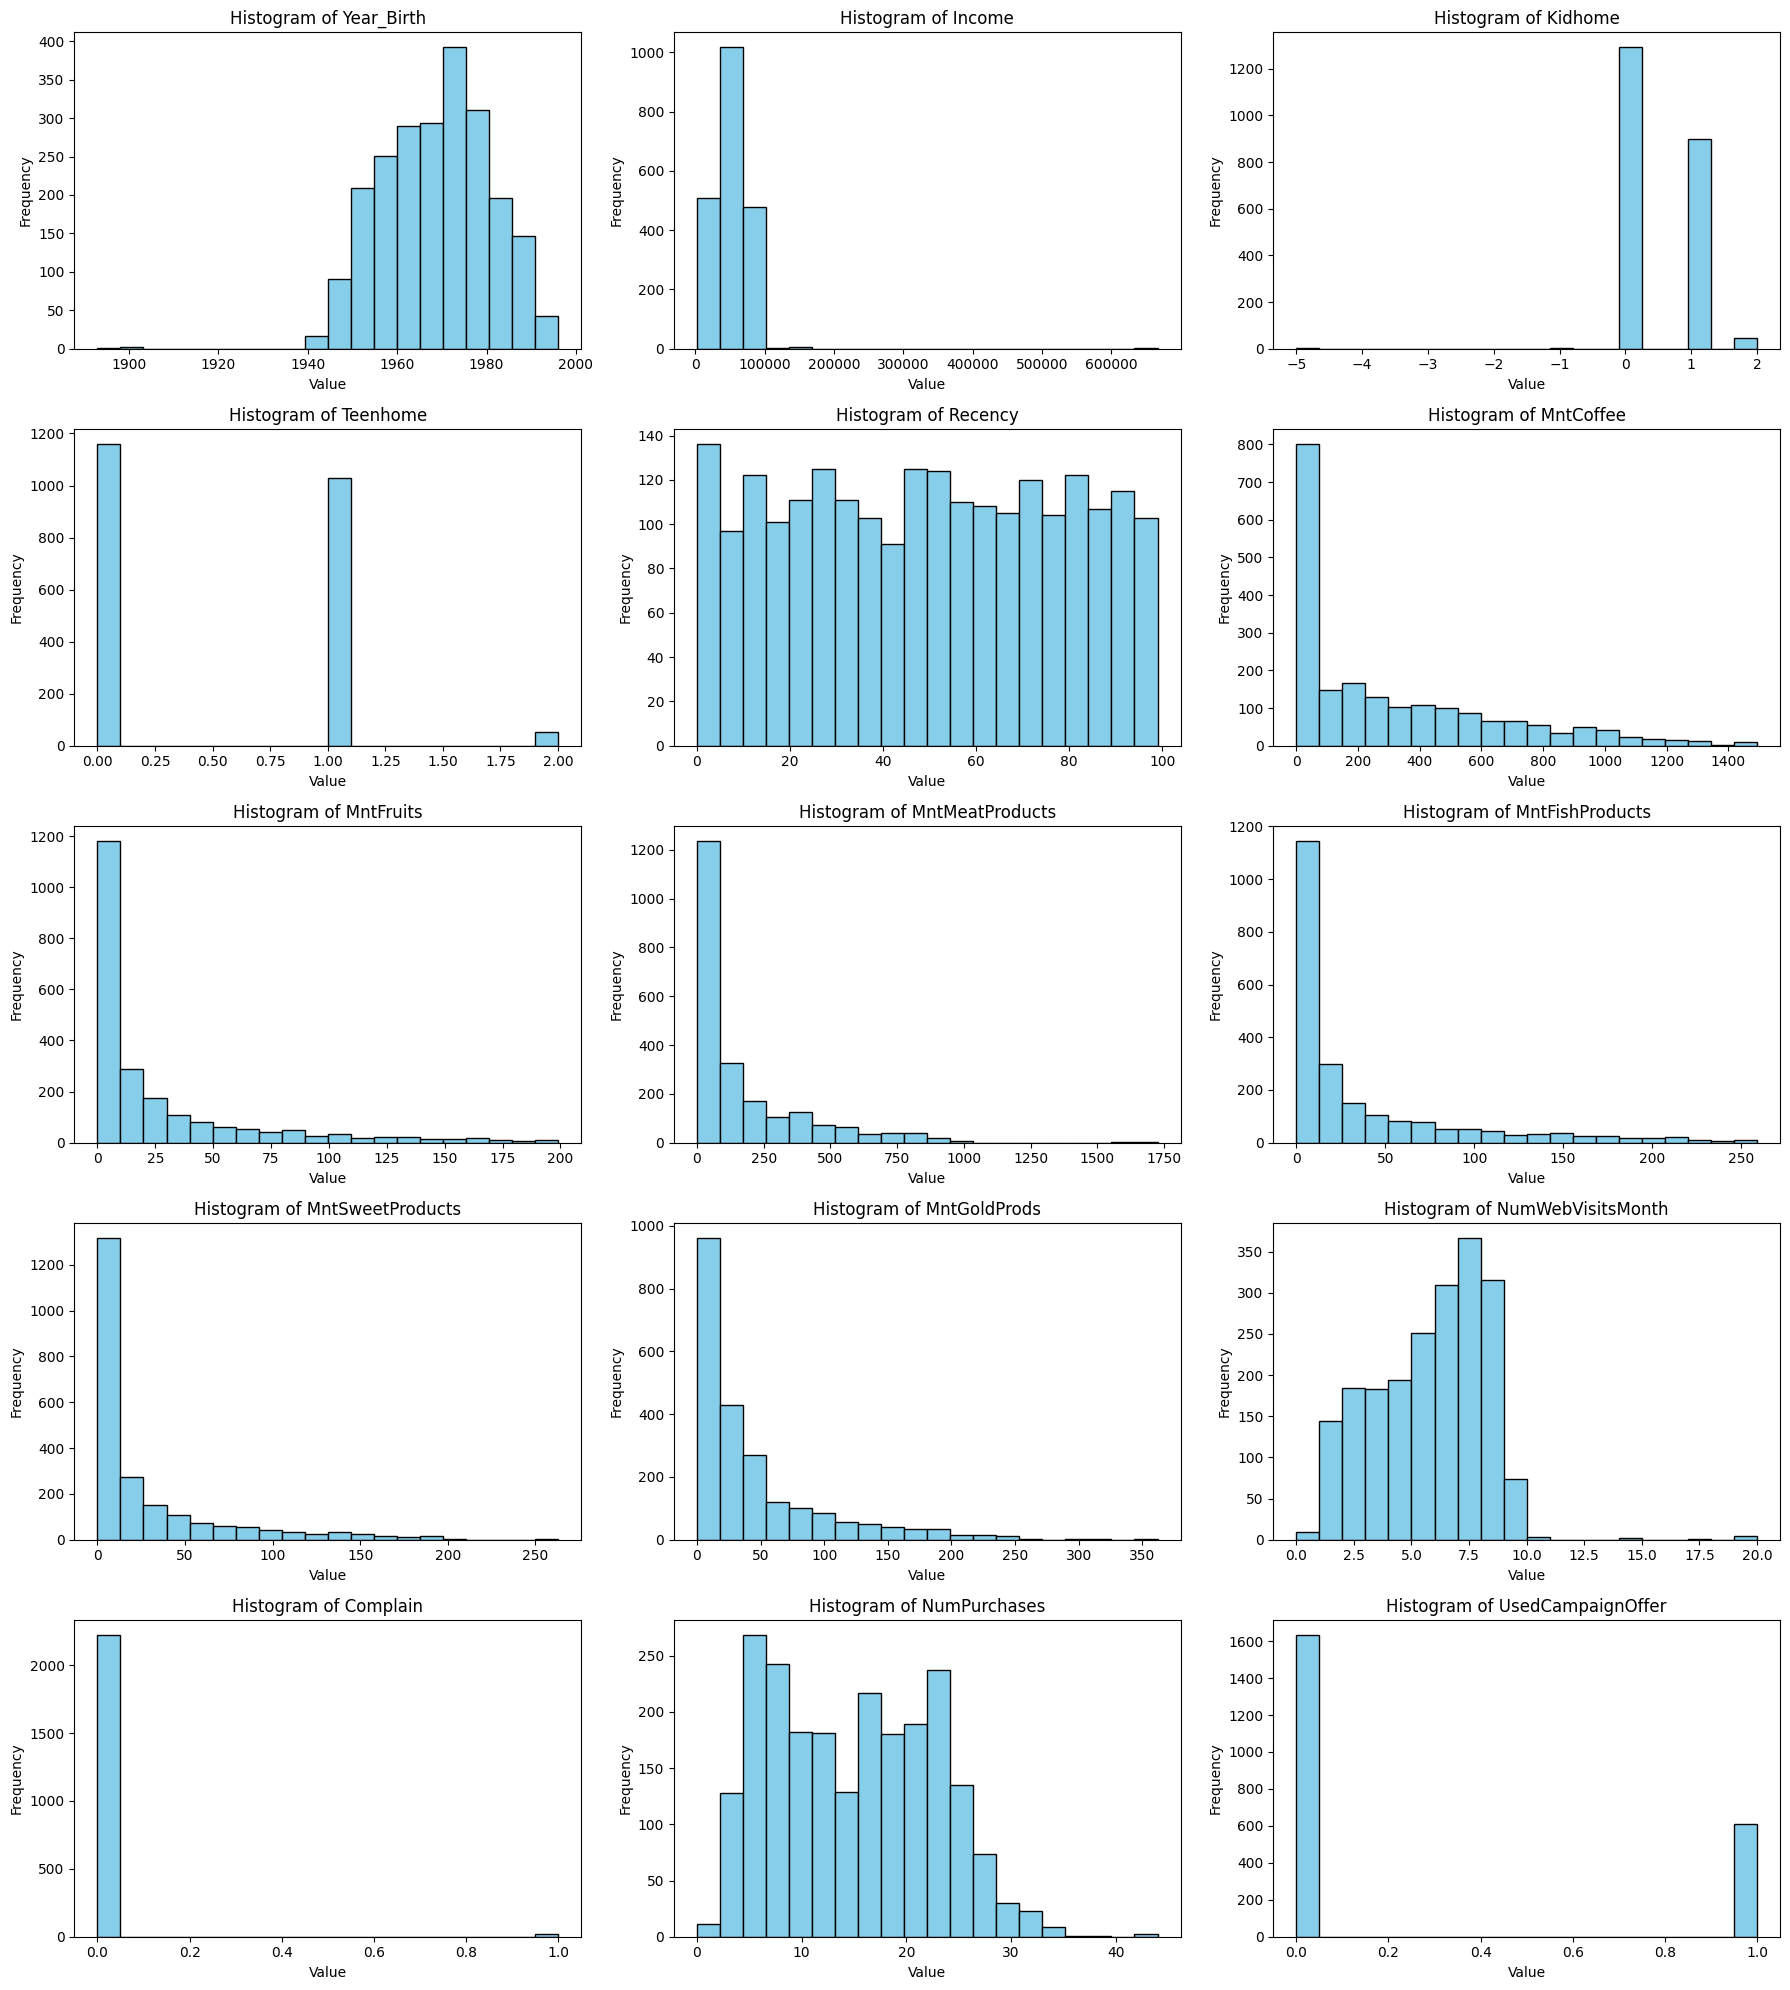

In [ ]:
import matplotlib.pyplot as plt

filtered_data = data.iloc[:, 2:].select_dtypes(include=['number'])

num_plots = len(filtered_data.columns)
num_rows = (num_plots + 2) // 3

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(18, num_rows * 4))
axes = axes.flatten()

for idx, column in enumerate(filtered_data.columns):
    axes[idx].hist(filtered_data[column].dropna(), bins=20, color='skyblue', edgecolor='black')
    axes[idx].set_title(f'Histogram of {column}')
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')


for ax in axes[num_plots:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()


## Bar Plots

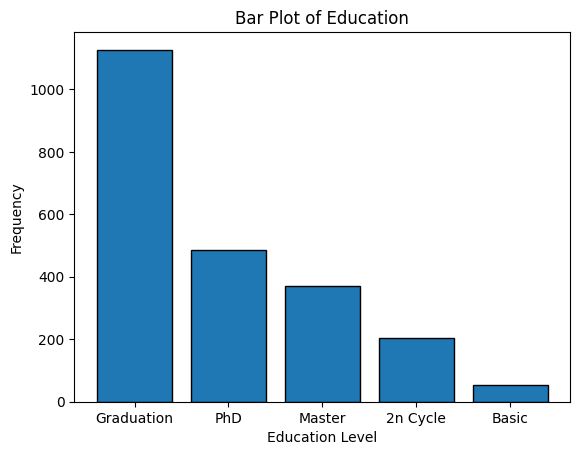

In [ ]:
# Bar plot for Education
education_counts = data['Education'].value_counts()

plt.bar(education_counts.index, education_counts.values, edgecolor='black')
plt.title('Bar Plot of Education')
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.show()


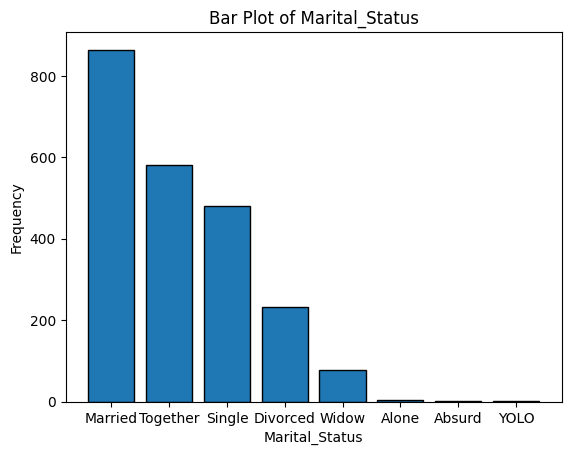

In [ ]:
# Bar plot for Education
education_counts = data['Marital_Status'].value_counts()

plt.bar(education_counts.index, education_counts.values, edgecolor='black')
plt.title('Bar Plot of Marital_Status')
plt.xlabel('Marital_Status')
plt.ylabel('Frequency')
plt.show()


## Correlations

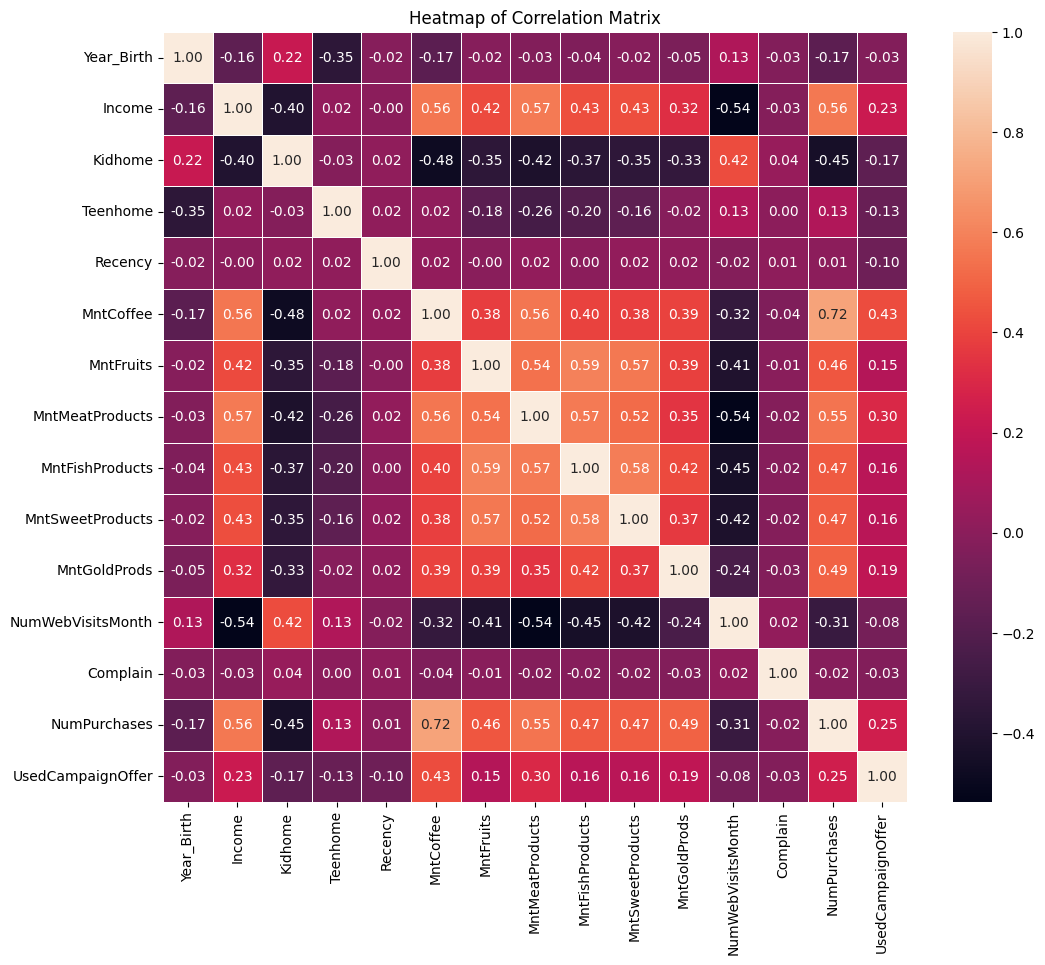

In [ ]:
correlation_matrix = filtered_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cbar=True, linewidths=.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [ ]:
target_correlation = filtered_data.corrwith(filtered_data['NumPurchases']).sort_values()
target_correlation

Kidhome             -0.447073
NumWebVisitsMonth   -0.309666
Year_Birth          -0.168304
Complain            -0.020583
Recency              0.005740
Teenhome             0.133163
UsedCampaignOffer    0.251386
MntFruits            0.455461
MntFishProducts      0.469454
MntSweetProducts     0.472876
MntGoldProds         0.493939
MntMeatProducts      0.554229
Income               0.562603
MntCoffee            0.715164
NumPurchases         1.000000
dtype: float64

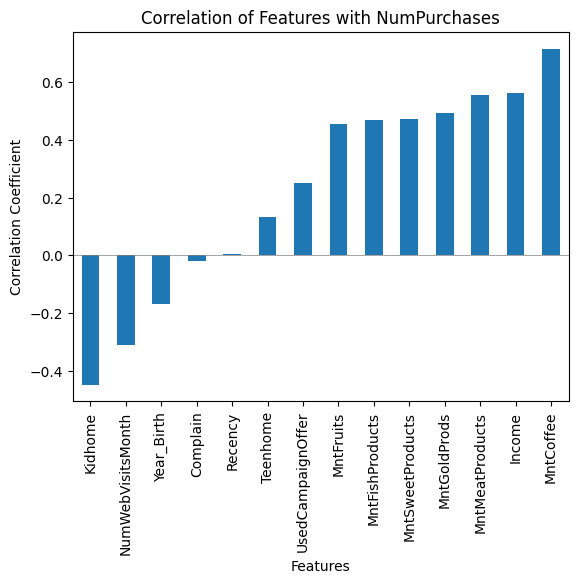

In [ ]:
target_correlation.drop('NumPurchases').sort_values().plot(kind='bar')
plt.title('Correlation of Features with NumPurchases')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.axhline(0, color='gray', linewidth=0.5)
plt.show()

#Part2: Preprocessing & Normalization

## Handling missing values

In [ ]:
data['Income'] = data['Income'].fillna(data['Income'].median())

data['MntCoffee'] = data['MntCoffee'].fillna(data['MntCoffee'].mean())

data['MntGoldProds'] = data['MntGoldProds'].fillna(data['MntGoldProds'].mean())

data['NumWebVisitsMonth'] = data['NumWebVisitsMonth'].fillna(data['NumWebVisitsMonth'].median())

# Checking again
print(data.isnull().sum())

Unnamed: 0           0
ID                   0
Year_Birth           0
Education            0
Marital_Status       0
Income               0
Kidhome              0
Teenhome             0
Dt_Customer          0
Recency              0
MntCoffee            0
MntFruits            0
MntMeatProducts      0
MntFishProducts      0
MntSweetProducts     0
MntGoldProds         0
NumWebVisitsMonth    0
Complain             0
NumPurchases         0
UsedCampaignOffer    0
dtype: int64


## Split train test

In [ ]:
def split_data(x, y, ratio):
    data = np.column_stack((x, y))
    np.random.shuffle(data)
    split_idx = int(len(data) * ratio)

    x_train = data[:split_idx, :-1]
    y_train = data[:split_idx, -1]
    x_test = data[split_idx:, :-1]
    y_test = data[split_idx:, -1]

    return x_train, x_test, y_train, y_test


x = data.drop('NumPurchases', axis=1).values
y = data['NumPurchases'].values

x_train, x_test, y_train, y_test = split_data(x, y, 0.8)

print('Train set size:', len(x_train))
print('Test set size:', len(x_test))

Train set size: 1792
Test set size: 448


#Part4: Regression

In [ ]:
selected_feature_train = x_train[:,10]
selected_feature_test = x_test[:,10]

def linear_regression(x, y):
    N = len(x)
    x_sum = np.sum(x)
    y_sum = np.sum(y)
    xy_sum = np.sum(x * y)
    xx_sum = np.sum(x * x)

    a = (N * xy_sum - x_sum * y_sum) / (N * xx_sum - x_sum ** 2)
    b = (y_sum - a * x_sum) / N
    return a, b

def calculate_rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

def r_squared(y_true, y_pred):
    total_variance = np.var(y_true)
    unexplained_variance = np.mean((y_true - y_pred) ** 2)
    return 1 - (unexplained_variance / total_variance)


a, b = linear_regression(selected_feature_train, y_train)
y_pred_train = a * selected_feature_train + b


rmse_train = calculate_rmse(y_train, y_pred_train)
r2_train = r_squared(y_train, y_pred_train)

y_pred_test = a * selected_feature_test + b

rmse_test = calculate_rmse(y_test, y_pred_test)
r2_test = r_squared(y_test, y_pred_test)

print(f'Test data RMSE: {rmse_test}, R2: {r2_test}')

Test data RMSE: 5.515693934346293, R2: 0.5060615818164325


In [ ]:
import numpy as np

def standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std

selected_features_train = np.column_stack((x_train[:, 5], x_train[:, 10], x_train[:, 12])).astype(np.float64)
selected_features_test = np.column_stack((x_test[:, 5], x_test[:, 10], x_test[:, 12])).astype(np.float64)

selected_features_train = standardize(selected_features_train)
selected_features_test = standardize(selected_features_test)

y_train = y_train.astype(np.float64)
y_test = y_test.astype(np.float64)

def gradient_descent(X, y, lr, epochs):
    m, n = X.shape
    X = np.hstack((np.ones((m, 1)), X))  # 1 column for the intercept
    theta = np.zeros(n + 1)
    cost_history = []

    for _ in range(epochs):
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = X.T.dot(errors) / m
        theta -= lr * gradient
        cost = (1 / (2 * m)) * np.sum(errors ** 2)
        cost_history.append(cost)

    return theta, cost_history

# parameters
learning_rate = 0.01
epochs = 1000

theta, cost_history = gradient_descent(selected_features_train, y_train, learning_rate, epochs)

def predict(X, theta):
    return np.hstack((np.ones((X.shape[0], 1)), X)).dot(theta)

y_pred_train = predict(selected_features_train, theta)
y_pred_test = predict(selected_features_test, theta)

def calculate_rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

def r_squared(y_true, y_pred):
    total_variance = np.var(y_true)
    unexplained_variance = np.mean((y_true - y_pred) ** 2)
    return 1 - (unexplained_variance / total_variance)

rmse_train = calculate_rmse(y_train, y_pred_train)
rmse_test = calculate_rmse(y_test, y_pred_test)
r2_train = r_squared(y_train, y_pred_train)
r2_test = r_squared(y_test, y_pred_test)

print(f'Test data RMSE: {rmse_test}, R2: {r2_test}')


Test data RMSE: 5.332397723894167, R2: 0.5383449857788027
